In [1]:
import os
import netCDF4
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import seaborn as sns
from skimage.measure import block_reduce

In [2]:
os.getcwd()

'D:\\RCCR_mothership\\notebooks'

In [3]:
os.chdir('..')
os.getcwd()

'D:\\RCCR_mothership'

# User inputs

In [36]:
# USER INPUTS
#dir with the nc files
input_folder = Path(os.getcwd())/Path('data/golfo_dulce_acolite_confirmed')
# one of 'kd490_qaa6', 't_dogliotti', 't_nechad2016', 'spm_nechad2016', depending on acolite settings
measurement_name = 'kd490_qaa6'
# downsampling size, in pixels
downsample_size = (20, 20)

coord_list = [{'name':'punta_gallardo', 'coord': (8.62627, -83.23646)},
             {'name':'punta_islotes', 'coord': (8.72706, -83.38729)},
             {'name':'pelagos_site', 'coord': (8.72750, -83.40811)},
             {'name':'nursery_sites', 'coord': (8.65672, -83.27406)}]
timeseries_save_path = Path(os.getcwd())/Path('data/timeseries_csvs/')

# Warnings

In [5]:
# WARNING 1: 
# to create the image, we have to pick which of the two sizes to use. 
# This must be done manually, in a cell that is a little furter down

# WARNING 2:
# there seemed to be something wrong with the last image. Dont know why, or why it's the last, 
# but we remove it manually in the 'Some checks' section. Please check yourself!

#### data to look up: 'kd490_qaa6', 't_dogliotti', 't_nechad2016', 'spm_nechad2016'; use these as input for the next function <font color=black></font>

In [6]:
#collector function for the above data, found inside the nc files, and to store it in an array
def collection(input_measure):
    
    #collection_input_data = [np.zeros(shape=(1,1))]
    collection_input_data = []
    
    for file in input_folder.glob('*/*L2W.nc'):
        #if file.endswith(".nc"):
        #print(file)
        nc_file = netCDF4.Dataset(file)
        measure = nc_file.variables[input_measure][:]
        #print(measure.shape)
        temp_input_data = pd.DataFrame(measure[0:measure.shape[0],0:measure.shape[1]])
        #temp_input_data = temp_input_data.fillna(0)
        temp_input_data = temp_input_data.to_numpy()
        collection_input_data.append(temp_input_data)
        
        
    #collection_input_data2 = collection_input_data[1:4]
    collection_input_data3 = np.array(collection_input_data)
    print("made")
    
    return collection_input_data3

In [7]:
#collect the kd490_qaa6 data from nc files and store it in an array
measurement_data = collection(measurement_name)

made


In [8]:
lat = collection('lat')
lon = collection('lon')

made
made


In [10]:
sizes = [im.shape for im in measurement_data]
dates = [netCDF4.Dataset(file).isodate for file in input_folder.glob('*/*L2W.nc')]
pd.Series(sizes).value_counts()

(5676, 2430)    28
(5598, 4770)    22
dtype: int64

In [11]:
reduced_data = [block_reduce(im, downsample_size, np.nanmean) for im in measurement_data]

reduced_lat = [block_reduce(im, downsample_size, np.nanmean) for im in lat]

reduced_lon = [block_reduce(im, downsample_size, np.nanmean) for im in lon]

reduced_sizes = [im.shape for im in reduced_data]
pd.Series(reduced_sizes).value_counts()

C:\ProgramData\Anaconda3\lib\site-packages\skimage\measure\block.py:76: RuntimeWarning: Mean of empty slice
  return func(blocked, axis=tuple(range(image.ndim, blocked.ndim)))


(284, 122)    28
(280, 239)    22
dtype: int64

## Create image of the average measure over time

#### Choose which set of images to use for the average image

In [12]:
# PICK THE SIZE YOU WANT 
# (there are two different sized, so you have to pick one)
shape = (280,239)
#shape = (56,48)

In [16]:
def get_average_image(shape, measurement):
    base_im = np.zeros(shape)
    counter = 0
    #nan counter
    #nan_counter = np.zeros(shape)
    #for i, im in enumerate(reduced_kd490):
    #    if im.shape[1] == shape[1]:
    #        nan_counter += np.isnan(im)

    for i, im in enumerate(measurement):
        if im.shape[1] == shape[1]:
            #im[np.isnan(im)]=0.0
            base_im += np.nan_to_num(im, nan = 0.0, posinf=None, neginf=0.0)
            counter += 1


    avg_im = base_im / (counter)
    return avg_im

In [17]:
avg_im = get_average_image(shape, reduced_data)

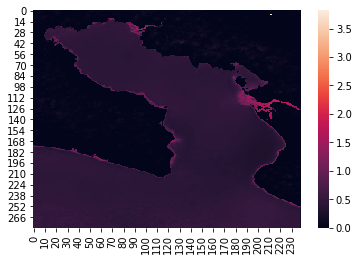

In [39]:
f = sns.heatmap(avg_im)

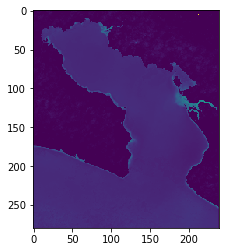

In [19]:
plt.imshow(avg_im)

## Some checks

In [20]:
mean_lat, mean_lon = np.mean([im.mean() for im in reduced_lat]), np.mean([im.mean() for im in reduced_lon])

In [21]:
np.std(reduced_lat[0][0,:-2]) #the coords do vary a bit (and there's something wrong with the last one)

0.0006018513

In [22]:
# lat is constant along the second axis, so we want to argmin to
reduced_lat[0][:,0]

array([8.7696085, 8.767803 , 8.765997 , 8.764192 , 8.762385 , 8.76058  ,
       8.758775 , 8.756969 , 8.755163 , 8.753358 , 8.751552 , 8.749746 ,
       8.74794  , 8.746135 , 8.7443285, 8.742524 , 8.740718 , 8.738913 ,
       8.737107 , 8.735302 , 8.733496 , 8.73169  , 8.729884 , 8.728078 ,
       8.726273 , 8.724468 , 8.722661 , 8.720857 , 8.71905  , 8.717245 ,
       8.715438 , 8.7136345, 8.711828 , 8.710023 , 8.708217 , 8.70641  ,
       8.704605 , 8.7028   , 8.700994 , 8.699189 , 8.697383 , 8.695576 ,
       8.693771 , 8.691966 , 8.69016  , 8.688355 , 8.686549 , 8.684743 ,
       8.682938 , 8.681131 , 8.679326 , 8.677522 , 8.675715 , 8.67391  ,
       8.672103 , 8.670299 , 8.668492 , 8.666688 , 8.664882 , 8.6630745,
       8.661269 , 8.659465 , 8.657659 , 8.655852 , 8.654048 , 8.652241 ,
       8.650436 , 8.64863  , 8.646824 , 8.645019 , 8.643213 , 8.641407 ,
       8.639602 , 8.637796 , 8.63599  , 8.634185 , 8.63238  , 8.630573 ,
       8.628768 , 8.626963 , 8.625156 , 8.623351 , 

In [23]:
# notice that something is wrong with the last image, so get rid of it
reduced_data = reduced_data[:-1]
reduced_lat = reduced_lat[:-1]
reduced_lon = reduced_lon[:-1]
reduced_sizes = reduced_sizes[:-1]
dates = dates[:-1]

In [26]:
target = (8.654250, -83.368604)

In [27]:
def get_timerseries_for_coord(target,
                             measurements,
                             lat,
                             lon,
                             dates):
    series_values = []
    series_dates = []
    for i, im in enumerate(measurements):
        lat_idx = np.abs(lat[i][:,0]-target[0]).argmin()
        lon_idx = np.abs(lon[i][0,:]-target[1]).argmin()

        datapoint = im[lat_idx,lon_idx]

        series_values.append(datapoint)
        series_dates.append(dates[i])
        
    dtf = pd.Series(data=series_values, index=pd.DatetimeIndex(series_dates))
    return dtf

In [31]:
dtf = get_timerseries_for_coord(target, reduced_data, reduced_lat, reduced_lon, dates)

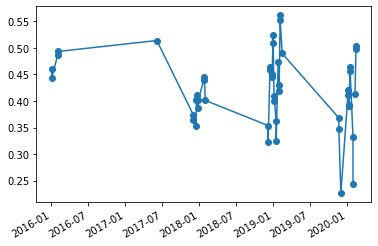

In [33]:
dtf.plot(marker='o')

In [38]:
for place in coord_list:
    dtf = get_timerseries_for_coord(place['coord'], reduced_data, reduced_lat, reduced_lon, dates)
    outname = timeseries_save_path/Path(place['name']+'.csv')
    outpath = Path(outname)
    dtf.to_csv(outname)